In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [3]:
import matplotlib.pyplot as plt

In [4]:
train = datasets.MNIST("",train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
# MNIST su rukom pisani brojevi
test = datasets.MNIST("",train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [6]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [7]:
x, y = data[0][0], data[1][0]
print(y)
print(data[0][0].shape)
print(data[1][0].shape)

tensor(3)
torch.Size([1, 28, 28])
torch.Size([])


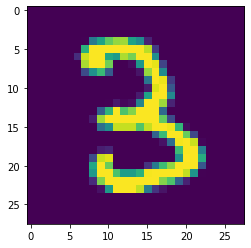

In [8]:
plt.imshow(data[0][0].view(28, 28))

In [9]:
# treba balansirati set
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs,ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total+=1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [10]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [11]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784, 64)# 784 je 28*28 pixela slike jer se slika iz matrice pretvori u vektor, 64 je output koji zelimo
        self.fc2=nn.Linear(64, 64)
        self.fc3=nn.Linear(64, 64)
        self.fc4=nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # if weather = sunny
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
       
        # else
        # ...
        # ovako mogu radit svasta zanimljivog
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [12]:
X = torch.rand((28, 28))
X = X.view(-1,28*28)

output = net(X)
output

tensor([[-2.2960, -2.3396, -2.3791, -2.3625, -2.2123, -2.2642, -2.2982, -2.2407,
         -2.3537, -2.2931]], grad_fn=<LogSoftmaxBackward>)

In [13]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3
for epoch in range(EPOCHS):
     for data in trainset:
            # data is a batch of featuresets and labels
            X, y = data
            net.zero_grad()
            output = net(X.view(-1,28*28))
            loss = F.nll_loss(output, y)
            loss.backward()
            optimizer.step()
print(loss)

C:\Users\Agata\Anaconda3\lib\site-packages\torch\autograd\__init__.py:145: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(


tensor(0.1092, grad_fn=<NllLossBackward>)


In [15]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print("Accuaracy: ", round(correct/total, 3))

Accuaracy:  0.978


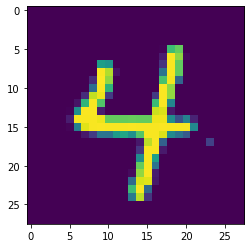

In [23]:
import matplotlib.pyplot as plt
plt.imshow(X[3].view(28,28))
plt.show()

In [24]:
print(torch.argmax(net(X[4].view(-1,784))[0]))

tensor(9)
